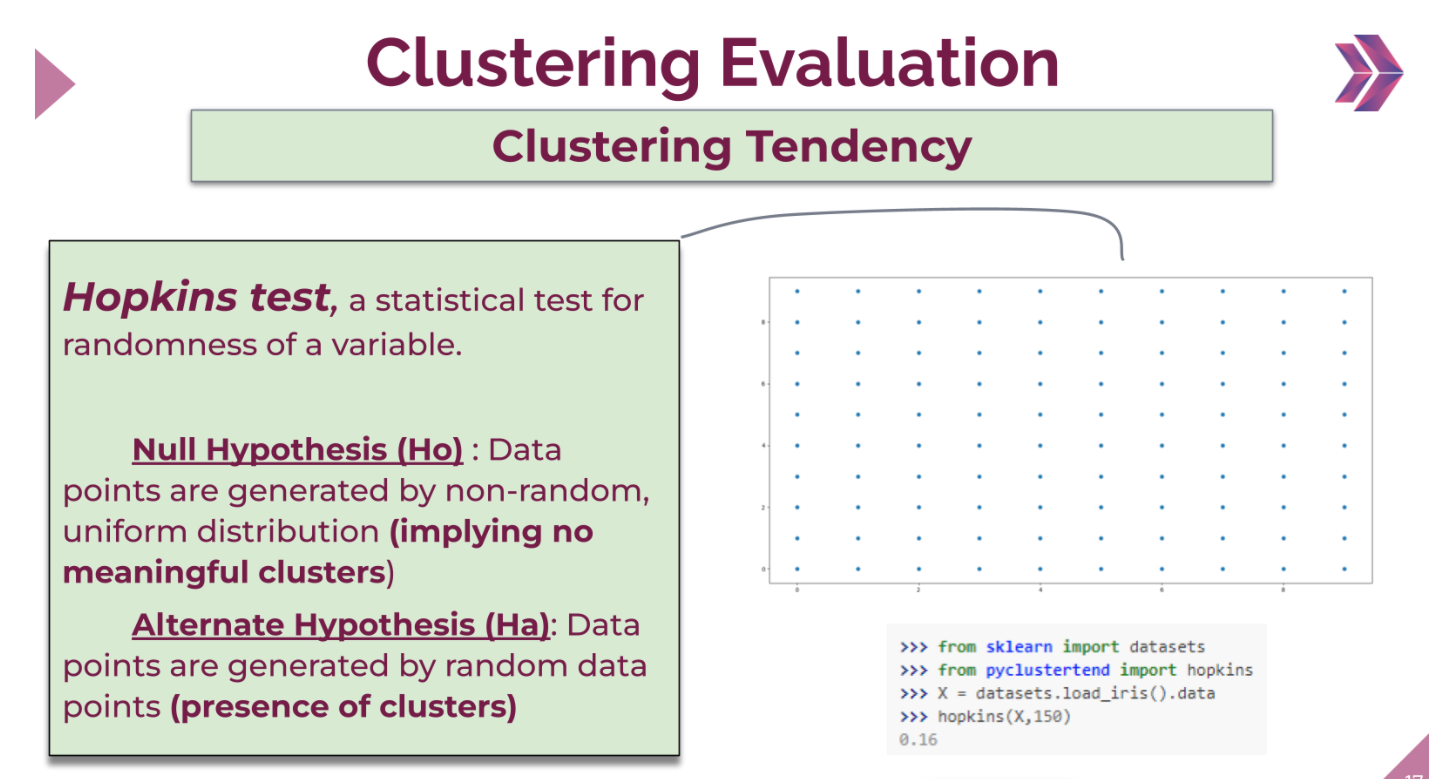

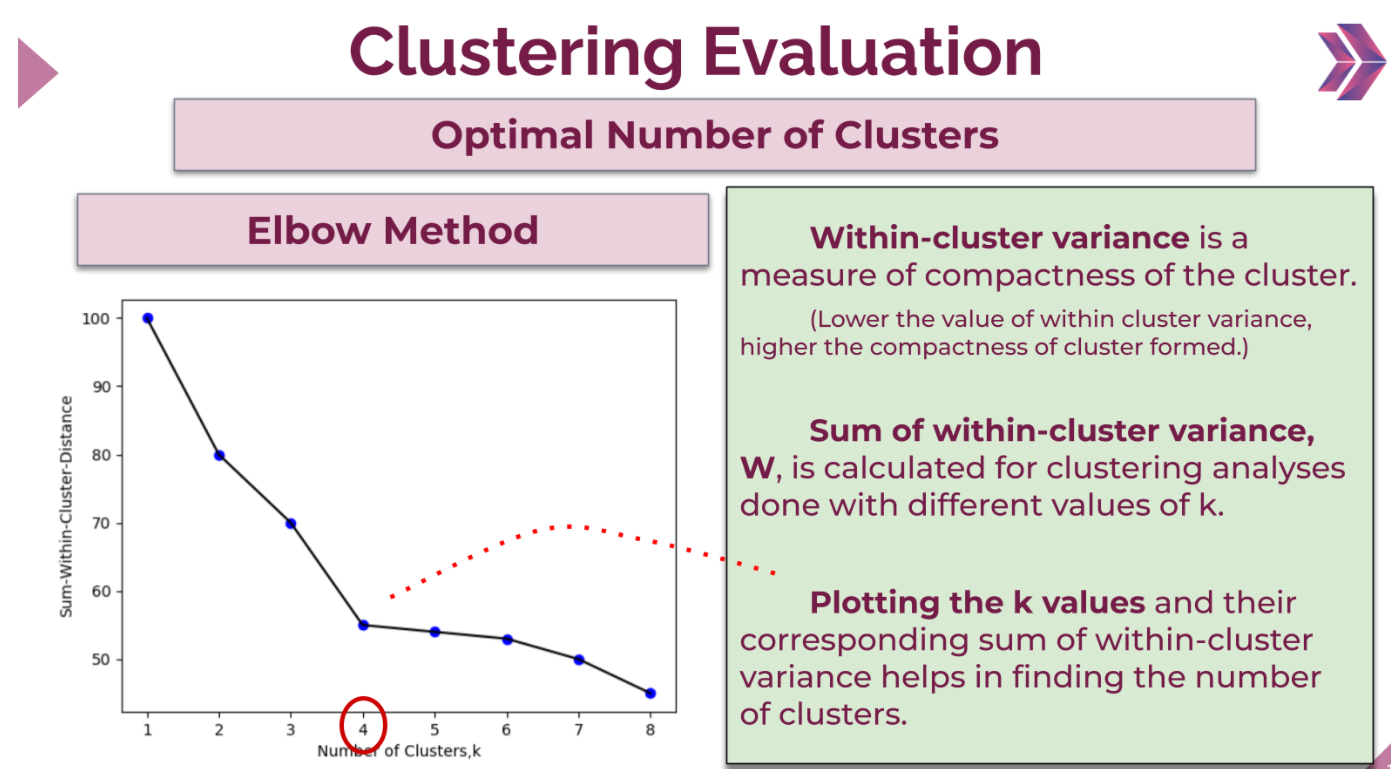

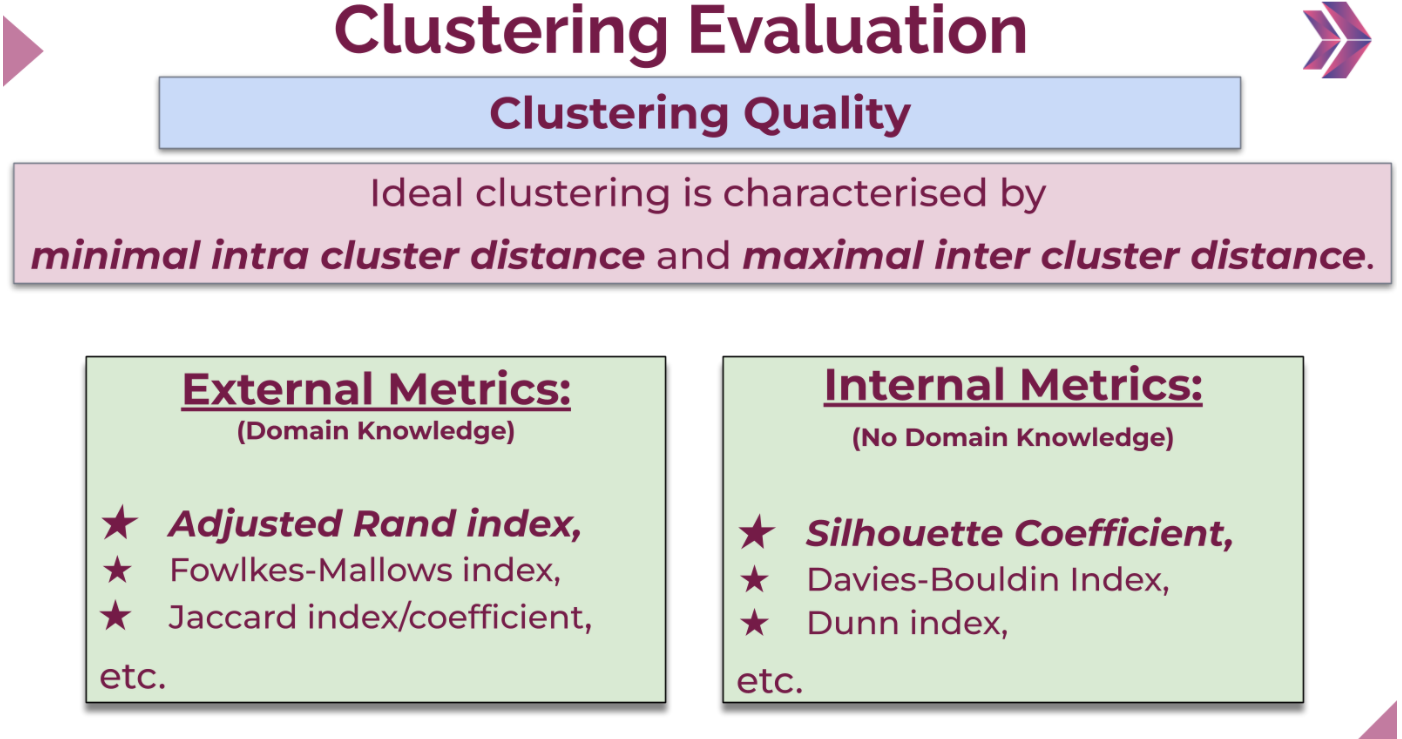

# K_Means Clustering

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [ ]:
df = sns.load_dataset("iris")

In [ ]:
df.head()
# 3 clusterımız var bunları nasıl daha başarılı kümeleyebiliriz onu göreceğiz. ama uzman desteği mutlaka gerekir.
# belli bir insan grubunu, kitleyi gruplandıracaksak falan o zaman domain knowledge gerekemez o kadar
# k means gerçek dünya verilerinde çok başarılı değil.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


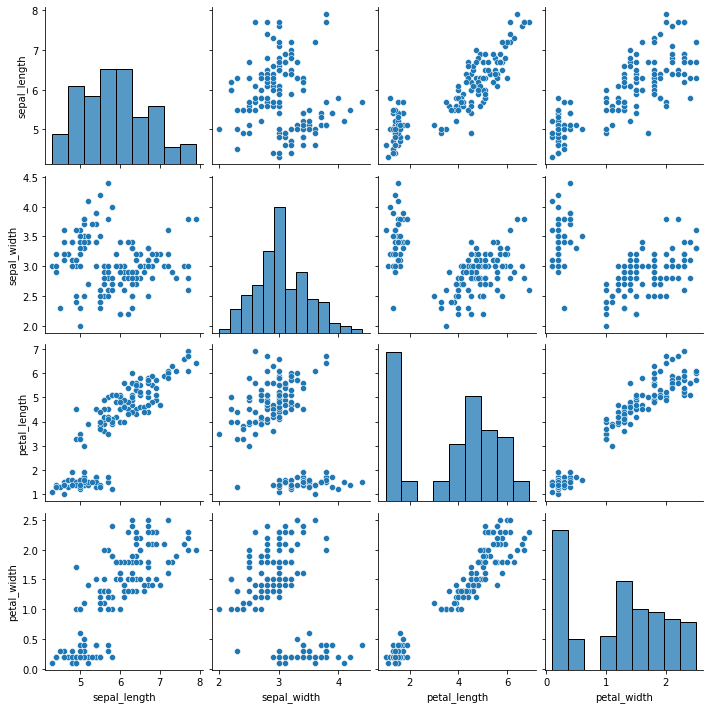

In [ ]:
sns.pairplot(df)
plt.show()
# gözlemler arasında kümeleme olup olmadığını görebiliyoruz. 2'ye bölünmeyle alakalı çok net bir insight sağlıyor mesela.


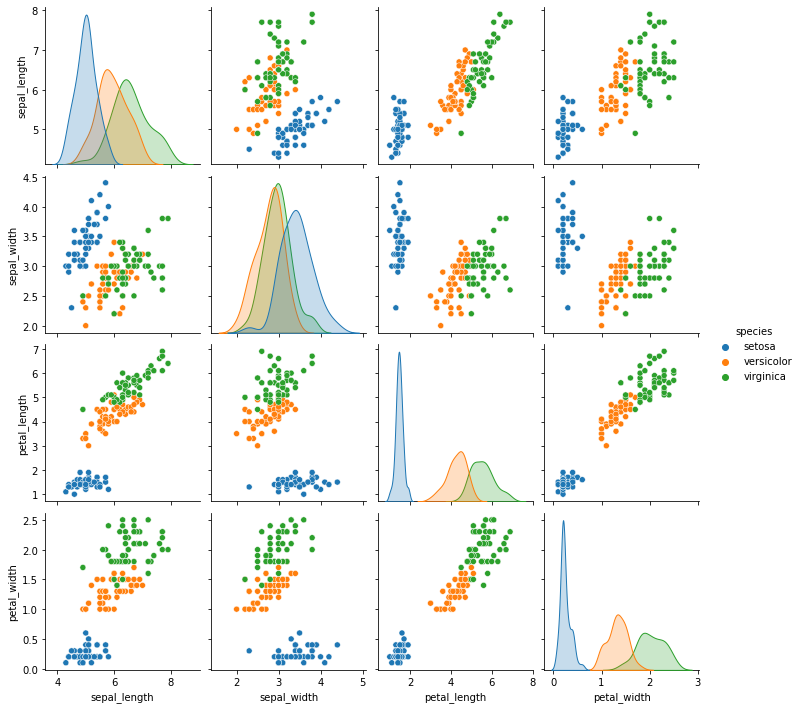

In [ ]:
sns.pairplot(df, hue = "species")
plt.show()

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our data has the same unit of measure, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You have to experience

clustering yaparken ordan alacağın sonuçları uzman desteği almadan veya domain desteği olmadan müşteriye sunmak mümkün değildir. çünkü gerçek dünya verileri birbirine çok girift.

başımda bir eğitmenim bir rehberim yok sadece benzerliklerine bakarak kümelemeye çalışıyorum. ama benzerliklerine bakarak kümelemek çok tehlikeli çünkü gerçek dünyada veriler birbirine çok benzer. Bu durumda uzman desteğine başvuruyorum. benim cluster problemi bunu 3 ayrı kümeye böldü. bak bakalım bunlar gerçek hayata uyuyor mu uymuyor mu? sorusuna cevap arıyorum.

## K_Means Clustering

In [ ]:
X = df.drop("species", axis =1) # bizim train | split gibi bir derdimiz olmayacak unsupervised learning'de

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X.shape

(150, 4)

In [ ]:
from sklearn.cluster import KMeans
# init='k-means++' noktayı rastgele seçmek yerine biraz daha merkeze yakın olabilecek yerleri seçiyor.
# çünkü ilk centroid noktası random
# random state belirlemez iseniz her seferinde yer değiştirebilir
K_means_model = KMeans(n_clusters=5, random_state=42)

In [ ]:
# fit ve predict i ayrı ayrı kullanabiliriz.
# fit, arkadaki benzer paternleri belirliyor. predict deyince de aynı paterndeki gözlemleri kümeliyor.
# fit, arkadaki benzer paternleri belirliyor. predict deyince de aynı paterndeki gözlemleri kümeliyor.
K_means_model.fit_predict(X)       # ama biz genelde bu 'fit_predict' kullanacağız.
# belirlediği patternlere göre cluster ataması yapıyoruz burada tam olarak predict yapmıyoruz yani.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [ ]:
K_means_model.fit(X) # fit dediğimizde pattern'leri tespit ediyor
                     # eğer sadece fit'i kullanırsak, fit'ten sonra predict diyemeyiz, 'labels_' dememiz lazım
                     # fit_predict dersek predict değerlerimizi de görürürüz fakat 'fit' fonksiyonunu ayrı kullanırsak bu sefer 'labels_' de dememiz gerekir.

KMeans(n_clusters=5, random_state=42)

In [ ]:
K_means_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [ ]:
X["Classes"] = K_means_model.labels_

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


## Hopkins test

elimdeki data random mu dağılmış, uniform mu?

In [ ]:
X = X.drop("Classes", axis =1)

In [ ]:
# !pip install pyclustertend

In [ ]:
from pyclustertend import hopkins

In [ ]:
hopkins(X, X.shape[0])

0.16673758105394493

In [ ]:
# hopkins testE -yavaş çalıştığı için- sample size ı belirleyebiliriz.
# hocam hopkins testi yavaş olduğu için tüm datayı hopkins testine sokmuyoruz, 
# içinden örneklem seçip onlarla mı teste sokuyoruz.
# sampling_size parametresi içinden örneklem almaktır. fakat burada datamız çok büyük olmadığı için sampling size girmedik.
hopkins(X, X.shape[0])    
# skorumuz sonucu anlıyorum ki clustering'e meyilli bir datamız var.

0.1612368048075204

In [ ]:
# Hopkins test icin dummy featurelar atilir.

# Choosing The Optimal Number of Clusters

En optimal K değerimize karar vereceğiz burada.

In [ ]:
# Inertia. Kendi içinde centroid etrafında ne kadar sıkı kümelendiğini gösterir.
# INERTIA : bir kümenin kendi centroidi etrafında ne kadar iyi (ne kadar sıkı şekilde) kümelenmesidir. Yani datam birbirine çok girift değil.
# Güzelce ayrışmışlar
# yani uzaklıkların karelerinin toplamının minimum olduğu değer..  eğer kümelenme çok yayılmış ise iyi bir kümelemeden bahsedemeyiz.

# burada bizim datamız random 

## Elbow metod

In [ ]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

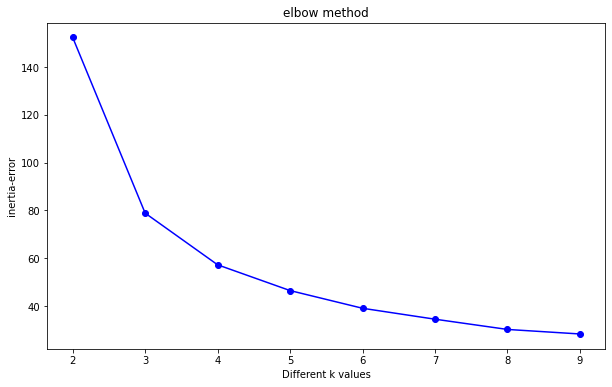

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
# ilk sert düşüşün durduğu nokta

In [ ]:
ssd # sum of squared distance

[152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.46949589883803,
 30.186555194805198,
 28.28937085137087]

In [ ]:
pd.Series(ssd).diff()
# sadece series ve dataframelerle çalışır

0          NaN
1   -73.496510
2   -21.622968
3   -10.782291
4    -7.406195
5    -4.570491
6    -4.282941
7    -1.897184
dtype: float64

In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,73.496510
3,21.622968
4,10.782291
5,7.406195
6,4.570491
7,4.282941
8,1.897184


***İLK en keskin düşüşün*** durduğu noktanın başlangıcı. yani yukarda 78.85 inertia ya denk gelen 2. nokta

<AxesSubplot:>

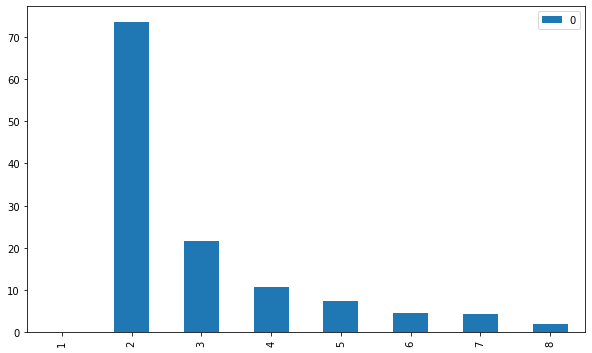

In [ ]:
df_diff.plot(kind='bar')

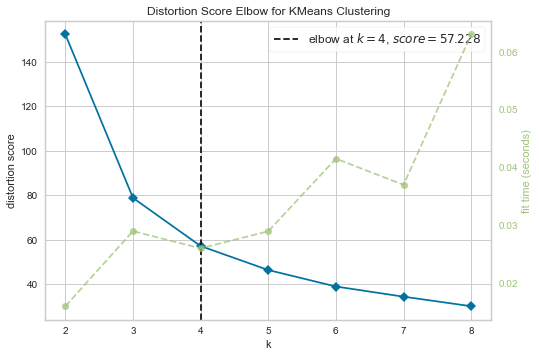

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# yellowbrick diyor ki benim için 73 bin de anlamlı bir düşüş
# Eğer datalarımız çok giriftse K-Means çuvallıyor. Burada da en iyi ayrımı yapan feature devreye giriyor

## Silhouette analysis

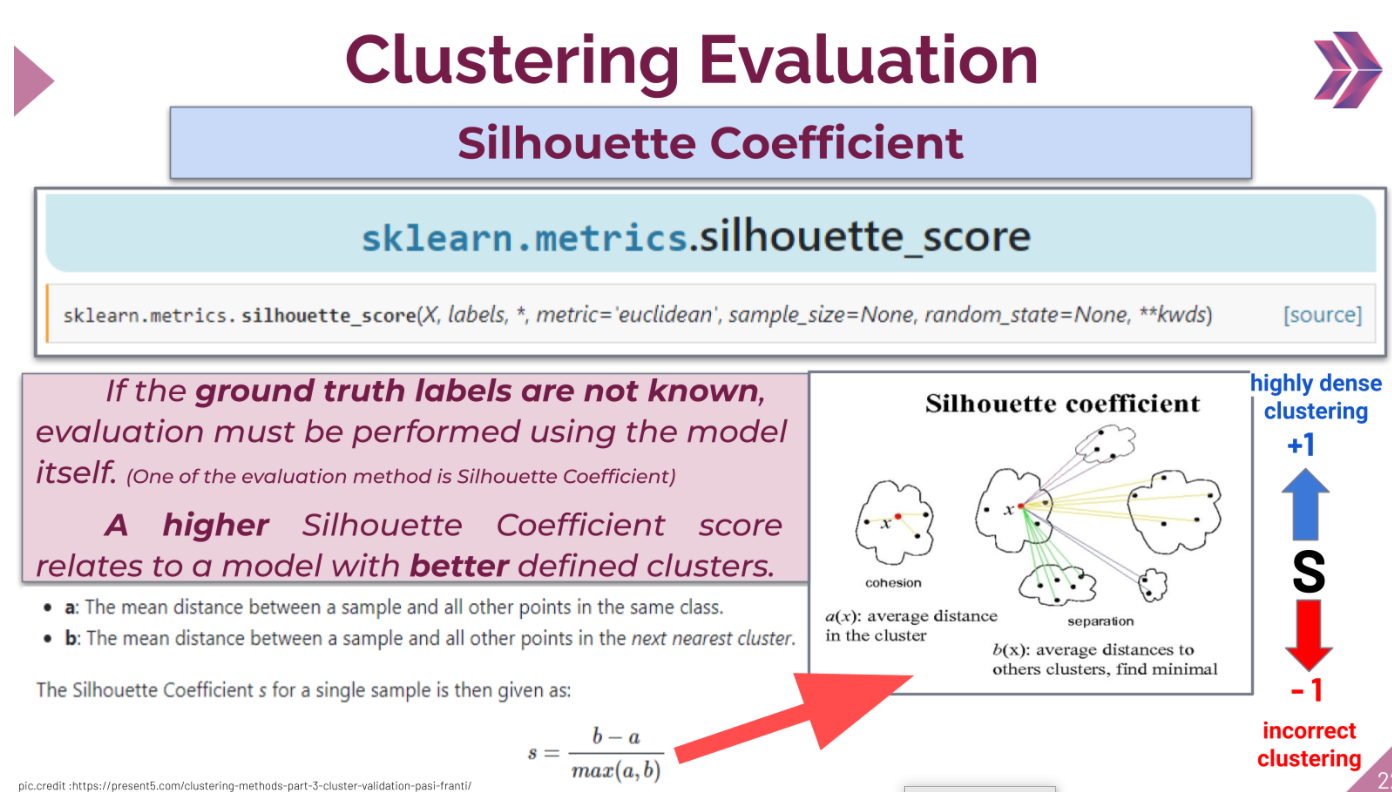

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

**inertia** kümelerin kendi içinde ne kadar yoğun biçimde kümelendiğini gösterirken,<br>
**silhouette** ise hem kendi içinde ne kadar sıkı kümelendiğinin yanında kümeler arasındaki mesafeninin de ne kadar uzak olduğunu gösteriyor.

silhouette skor 1'e ne kadar yakınsa kümelemeye o kadar yatkın olduğunu gösteriyor.
fakat bazen 1 e en yakın olan skor değil ondan biraz daha düşük olan skor seçilmeli çünkü istediğim şey hem inertia skoru en düşük olurken bunun yanında silhouette skorunun yüksek olması.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, K_means_model.labels_)

0.48874888709310654

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

# 2'de inertia değerim çok yüksekti. kümeleme başarılı olmamış yani. Bu yüzden de 3 veya 4 demeliyiz.
# 3'ün hem inertia değeri düşük hem de silhoutte score'u yüksek.
# biz mesela başta pairplotta 2 demiştik ama tabii ki bunlara bakmadan diyemeyiz. o bize sadece bir insight sağlar.

For n_clusters=2, the silhouette score is 0.6810461692117465
For n_clusters=3, the silhouette score is 0.5528190123564102
For n_clusters=4, the silhouette score is 0.49805050499728815
For n_clusters=5, the silhouette score is 0.48874888709310654
For n_clusters=6, the silhouette score is 0.36483400396700366
For n_clusters=7, the silhouette score is 0.34974816211612186
For n_clusters=8, the silhouette score is 0.3574536925852728


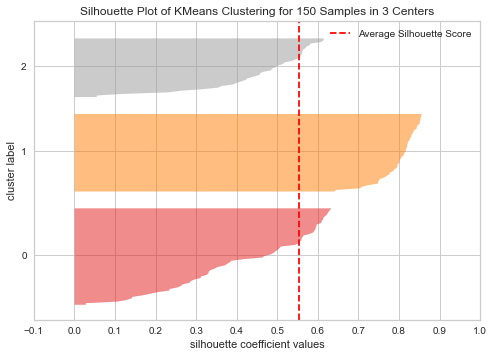

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();
# her classın kendi silhoutte skorunu da gösteriyor
# kalınlıklar gözlem sayımızı gösteriyor. mesela 0'da en fazla gözlem sayısı varmış.

## Building the model based on the optimal number of clusters

In [ ]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
clusters = model.labels_

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df["predicted_clusters"] = clusters

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [ ]:
ct = pd.crosstab(df.predicted_clusters, df.species) # crosstab = confusion matrix gibimsi
ct
# 0 diye tahmin ettiğim versiocolor mesela
# 1 diye tahmin ettiğim setosa
# 2 diye tahmin ettiğimse virginica
# labelladık. hepsine isim verdik.

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Adjust Rand Score

In [ ]:
from sklearn.metrics import adjusted_rand_score
# adjusted rand cezalandırarak skorlama yapar

In [ ]:
df_end = df
df_end
# Cluster algoritmasının accuracy'si diyebiliriz. Ama tam accuracy değil. Biraz daha cezalandırılmış hali

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
adjusted_rand_score(df_end.species, df_end.predicted_clusters)

0.7302382722834697

c = df.predicted_clusters:  renklendirmeyi modelimin tahmin ettiği cluster lara göre yap.

## Visualization Clusters

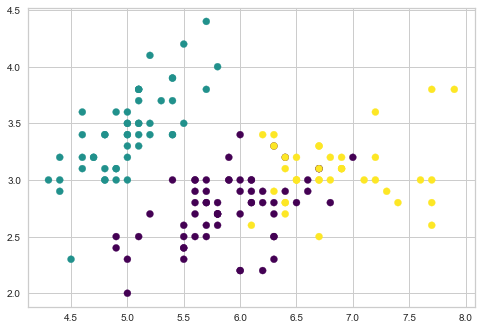

In [ ]:
plt.scatter(df["sepal_length"], df["sepal_width"], c = df.predicted_clusters, cmap = "viridis")

In [ ]:
#plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, cmap = "viridis")

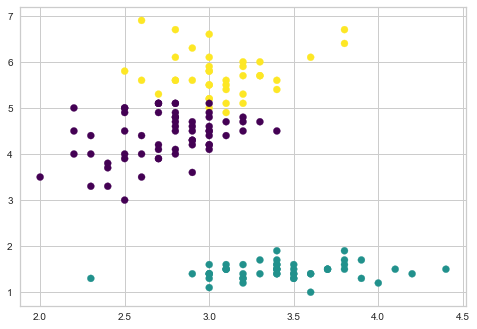

In [ ]:
plt.scatter(df["sepal_width"], df["petal_length"], c = df.predicted_clusters, cmap = "viridis")

In [ ]:
centers = model.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
centers[:,0] # centers of sepal_length feature

array([5.9016129, 5.006    , 6.85     ])

In [ ]:
centers[:,1] # centers of sepal_width feature

array([2.7483871 , 3.428     , 3.07368421])

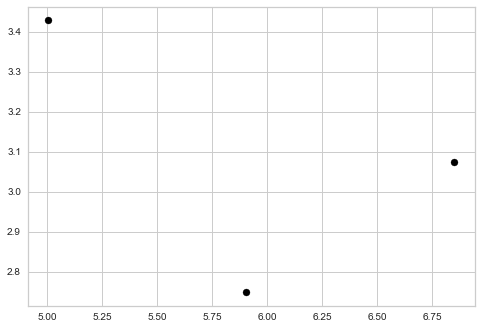

In [ ]:
plt.scatter(centers[:,0], centers[:,1], c = "black")

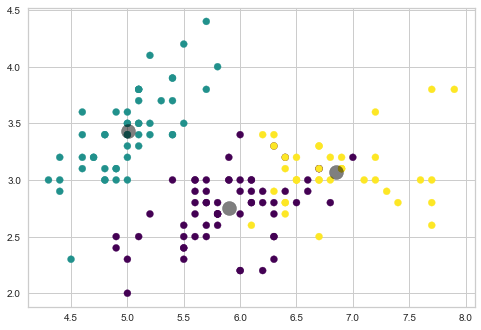

In [ ]:
plt.scatter(df["sepal_length"], df["sepal_width"], c = df.predicted_clusters, cmap = "viridis")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
# centerlarını bulduk, yaptığımız kümelemeye göre.

model.cluster_centers_ -->  ile centroidlerin koordinatlarını buluyoruz.

## Remodeling according to discriminating features

En önemli nokta !

Nasıl skorlarımızı iyileştirebiliriz kısmı

En büyük ayrımı sağlayan şeyi bulmaya çalışacağız.
Bir nevi >>> Feature selection

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [ ]:
df.iloc[:, [0, 1, 2, 3, 5]].head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
clus_pred = df.iloc[:, [0, 1, 2, 3, 5]].groupby("predicted_clusters").mean().T
clus_pred
# clusterlarımıza göre group by yaptık ve onların ortalamalarını aldık. En fazla ayrımı hangisi yapacak onu bulmaya çalışacağız.

predicted_clusters,0,1,2
sepal_length,5.901613,5.006,6.850000
sepal_width,2.748387,3.428,3.073684
petal_length,4.393548,1.462,5.742105
petal_width,1.433871,0.246,2.071053


<AxesSubplot:>

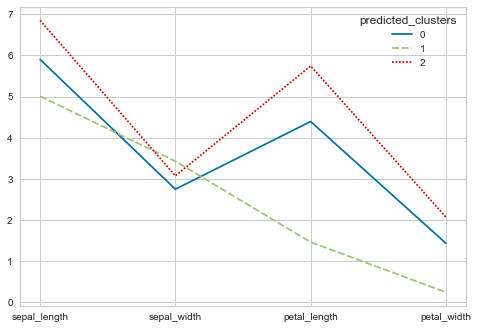

In [ ]:
sns.lineplot(data = clus_pred)
# Petal_length ve petal_width gayet ayrıklar duruyorlar birbirilerinden. Bu şekilde bir insight sağladık.
# Tekrardan şimdi modelimizi oluşturacağız.

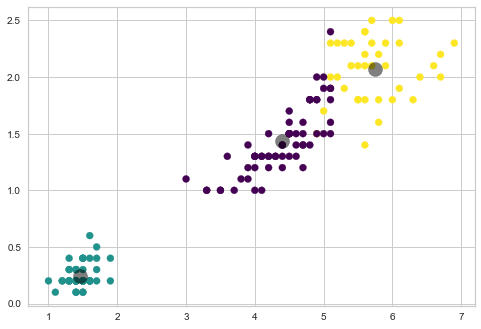

In [ ]:
plt.scatter(df["petal_length"], df["petal_width"], c = df.predicted_clusters, cmap = "viridis")
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)
# petal_length ve petal_width'e göre kümeleme yaparsak zaten datamız biraz daha iyi gözüküyor.

In [ ]:
X2 = df.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Hopkins test

In [ ]:
hopkins(X2, X2.shape[0])

0.1102182510243526

## Elbow metod

In [ ]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

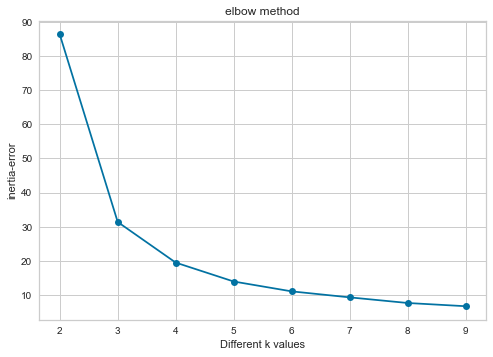

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [ ]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,55.018861
3,11.905370
4,5.549080
5,2.891764
6,1.757280
7,1.652462
8,0.944234


<AxesSubplot:>

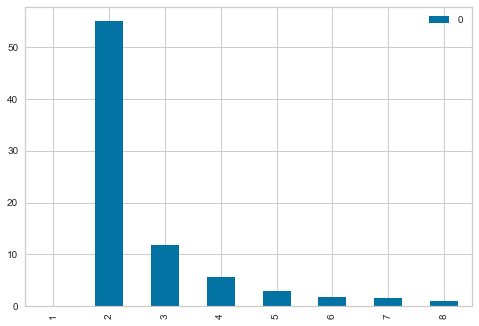

In [ ]:
df_diff.plot(kind='bar')

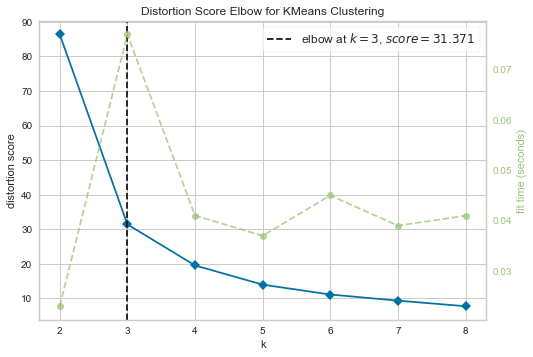

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

# skorlarımız yükselmiş. başarılı.

For n_clusters=2, the silhouette score is 0.7653904101258123
For n_clusters=3, the silhouette score is 0.6604800083974887
For n_clusters=4, the silhouette score is 0.6127580794464402
For n_clusters=5, the silhouette score is 0.5883732712110276
For n_clusters=6, the silhouette score is 0.576292818723561
For n_clusters=7, the silhouette score is 0.5640984340524553
For n_clusters=8, the silhouette score is 0.5902255624998716


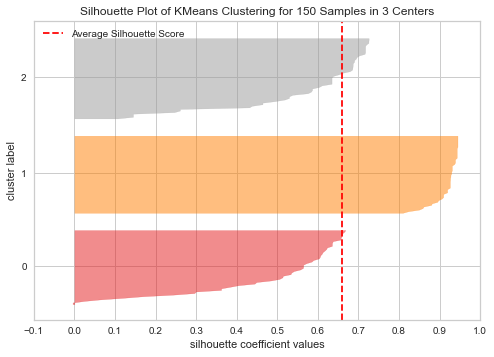

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();
# burdaki silhoutte skorlarımız da epey yükselmiş. 

Birbirinden iyi ayrılan featureları tespit edip ben modelimi bunlar üzerinden modellersem çok daha iyi skor alabilirim.
Birbirlerinden iyi ayrışan featureları tespit ediyoruz ve onlar kadar iyi ayrışmayanı eliyorum. bir nevi feature selection yapıyorum.

Normalde K means modelde 2 parametre önemli idi:<br>
K value<br>
SSD<br>
Ama burada @Orion C.-Instructor e @Johnson-Instructor Hocalar olayı arşa taşıyıp üçüncü bir parametre olarak:<br>
Feature selection<br>
ekleyerek woltran ı oluşturmuşlar

## Building the model based on the optimal number of clusters

In [ ]:
final_model = KMeans(n_clusters =3, random_state=42)
final_model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#final_model.labels_

In [ ]:
X2["species"] = df["species"]

In [ ]:
X2["predicted_clusters"] = final_model.labels_

In [ ]:
X2.head()

,petal_length,petal_width,species,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1


## Adjust Rand Score

In [ ]:
adjusted_rand_score(X2.species, X2.predicted_clusters)

0.8856970310281228

## Compare results

In [ ]:
pd.crosstab(X2.predicted_clusters, X2.species)

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


In [ ]:
X2_ct = pd.crosstab(X2.predicted_clusters, X2.species)
X2_ct.columns = ["setosa_X2", "versicolor_X2", "virginica_X2"]
X2_ct

,setosa_X2,versicolor_X2,virginica_X2
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


In [ ]:
X_ct = pd.crosstab(df.predicted_clusters, df.species).rename(index={0:2,2:0})
X_ct.columns = ["setosa_X", "versicolor_X", "virginica_X"]
X_ct

,setosa_X,versicolor_X,virginica_X
predicted_clusters,,,
2,0,48,14
1,50,0,0
0,0,2,36


In [ ]:
pd.concat([X2_ct, X_ct], axis =1)

,setosa_X2,versicolor_X2,virginica_X2,setosa_X,versicolor_X,virginica_X
predicted_clusters,,,,,,
0,0,2,46,0,2,36
1,50,0,0,50,0,0
2,0,48,4,0,48,14


## Prediction cluster of new data

In [ ]:
new_data = [[1.7, 0.2]]

In [ ]:
final_model.predict(new_data)

array([1])